In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show(img, title=None, cmap=None):
    plt.figure(figsize=(6,4))
    if img.ndim == 2:
        plt.imshow(img, cmap=cmap or "gray")
    else:
        plt.imshow(img)  # assume already RGB
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()

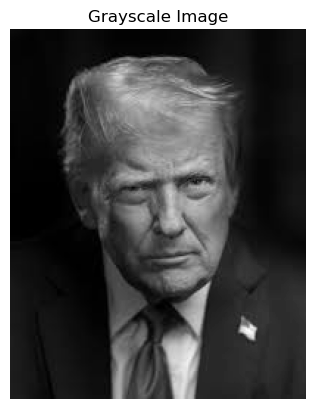

In [2]:

image_data = cv2.imread("trump.jpg", 0)

plt.imshow(image_data, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

### Bitwise operations

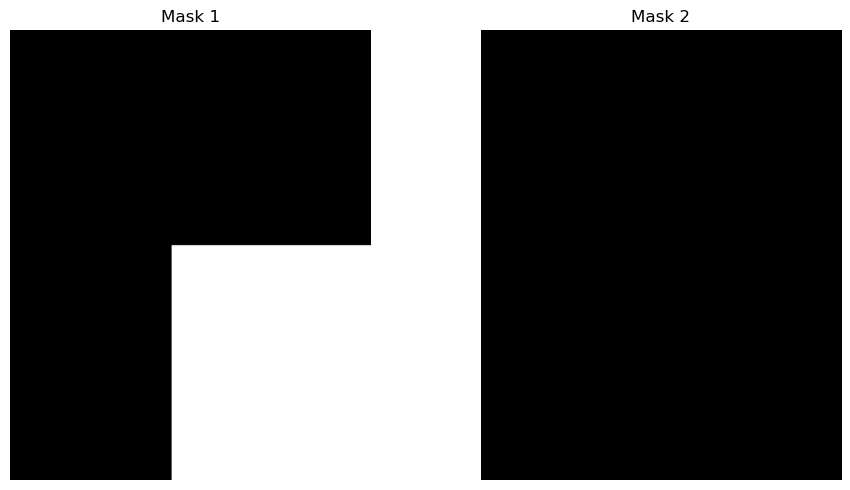

In [3]:

# initialize masks
mask1 = np.zeros(image_data.shape[:2], np.uint8)
mask2 = np.zeros(image_data.shape[:2], np.uint8)

# draw rectangles
cv2.rectangle(mask1, (90, 120), (380, 380), 255, -1)
cv2.rectangle(mask2, (350, 10), (635, 380), 255, -1)

# display using matplotlib
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(mask1, cmap='gray')
plt.title("Mask 1")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask2, cmap='gray')
plt.title("Mask 2")
plt.axis("off")

plt.tight_layout()
plt.show()

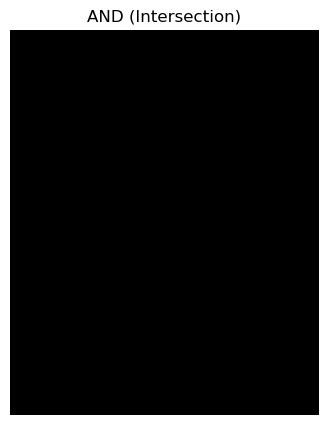

In [4]:
And = cv2.bitwise_and(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(And, cmap='gray')
plt.title("AND (Intersection)")
plt.axis("off")
plt.show()

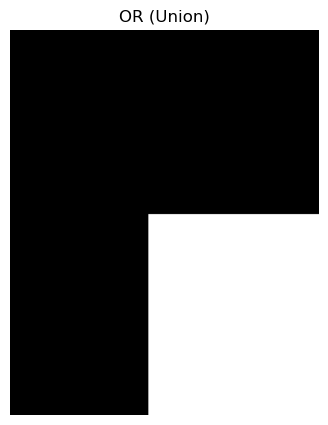

In [5]:
bitwiseOr = cv2.bitwise_or(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseOr, cmap='gray')
plt.title("OR (Union)")
plt.axis("off")
plt.show()

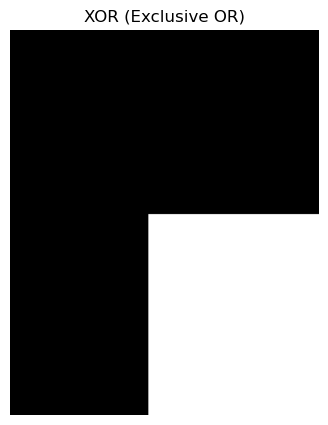

In [6]:

# Shows where either exists by itself (non-overlapping regions)
bitwiseXor = cv2.bitwise_xor(mask1, mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseXor, cmap='gray')
plt.title("XOR (Exclusive OR)")
plt.axis("off")
plt.show()

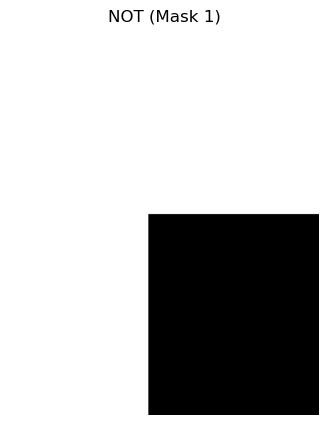

In [7]:
# Shows everything that isn't part of mask1
bitwiseNot_sq = cv2.bitwise_not(mask1)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseNot_sq, cmap='gray')
plt.title("NOT (Mask 1)")
plt.axis("off")
plt.show()

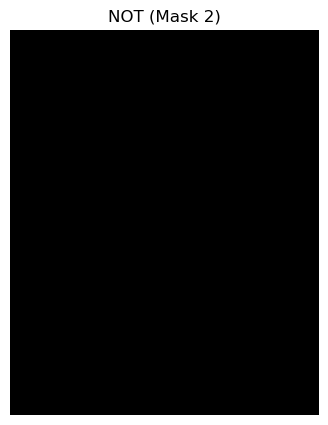

In [8]:
# Invert mask2
bitwiseNot_ell = cv2.bitwise_not(mask2)

plt.figure(figsize=(5,5))
plt.imshow(bitwiseNot_ell, cmap='gray')
plt.title("NOT (Mask 2)")
plt.axis("off")
plt.show()


So far we applied masks together with one another. But we can use the same operators to now apply the masks to the image itself

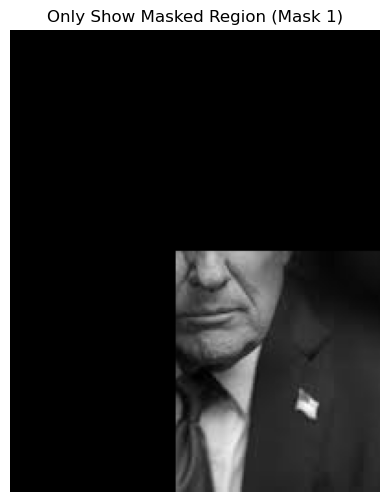

In [9]:
# Apply mask1 to the original image
puppy = cv2.bitwise_and(image_data, image_data, mask=mask1)

# Convert BGR to RGB for correct color display
puppy_rgb = cv2.cvtColor(puppy, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(puppy_rgb)
plt.title("Only Show Masked Region (Mask 1)")
plt.axis("off")
plt.show()

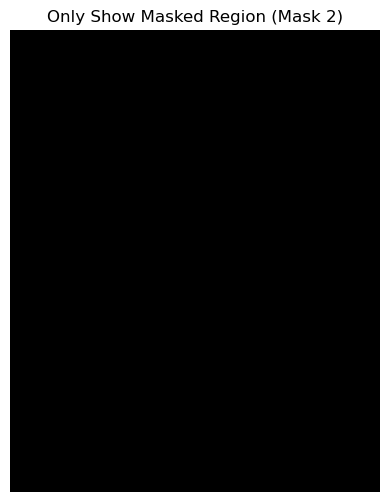

In [10]:
# Apply mask2 to the original image
dog = cv2.bitwise_and(image_data, image_data, mask=mask2)

# Convert BGR to RGB for correct color display
dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Only Show Masked Region (Mask 2)")
plt.axis("off")
plt.show()
     

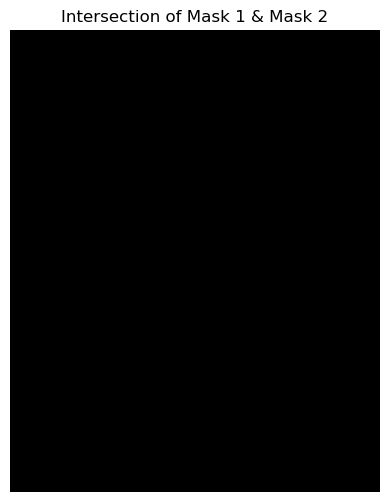

In [11]:
# Apply intersection mask (And) to the original image
dog = cv2.bitwise_and(image_data, image_data, mask=And)

# Convert BGR to RGB
dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Intersection of Mask 1 & Mask 2")
plt.axis("off")
plt.show()
     

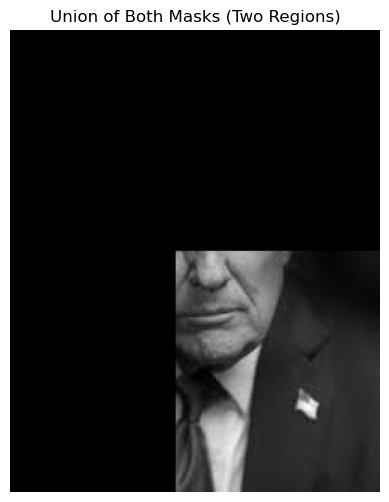

In [12]:
# Apply OR mask to the original image
dog = cv2.bitwise_and(image_data, image_data, mask=bitwiseOr)

# Convert BGR → RGB for proper display
dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dog_rgb)
plt.title("Union of Both Masks (Two Regions)")
plt.axis("off")
plt.show()

## TASK 1 — Circular Mask

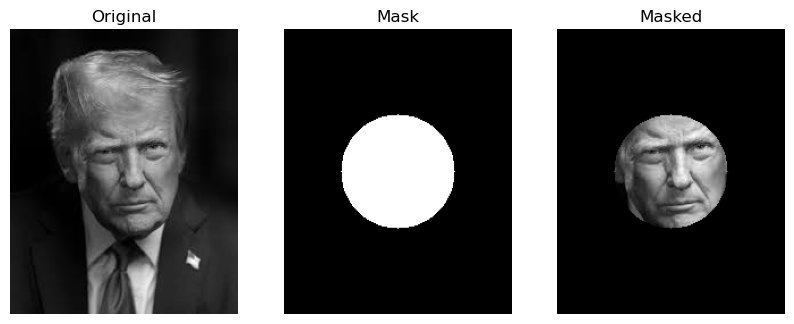

In [13]:
img = cv2.imread("trump.jpg", cv2.IMREAD_GRAYSCALE)

h, w = img.shape
mask = np.zeros((h, w), dtype=np.uint8)

center = (w//2, h//2)
radius = min(h, w)//4   # circle size relative to image

cv2.circle(mask, center, radius, 255, -1)

result = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(10,4))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(132); plt.imshow(mask, cmap='gray'); plt.title("Mask"); plt.axis("off")
plt.subplot(133); plt.imshow(result, cmap='gray'); plt.title("Masked"); plt.axis("off")
plt.show()

## TASK 2 — Bit-Plane Reconstruction (your image)

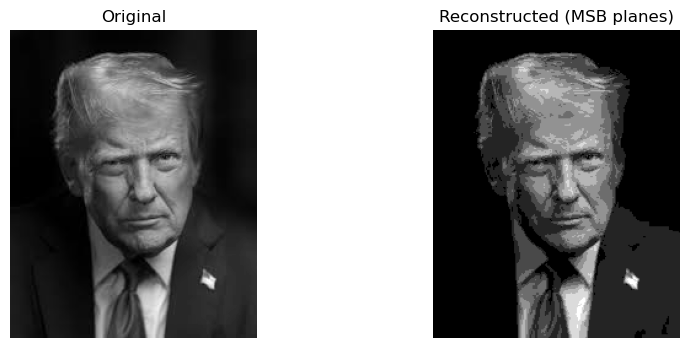

In [14]:
img = cv2.imread("trump.jpg", cv2.IMREAD_GRAYSCALE)

b7 = (img >> 7) & 1
b6 = (img >> 6) & 1
b5 = (img >> 5) & 1

reconstructed = (b7<<7) + (b6<<6) + (b5<<5)

plt.figure(figsize=(10,4))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(122); plt.imshow(reconstructed, cmap='gray')
plt.title("Reconstructed (MSB planes)")
plt.axis("off")
plt.show()

## TASK 3 — Histogram Equalization (your image)

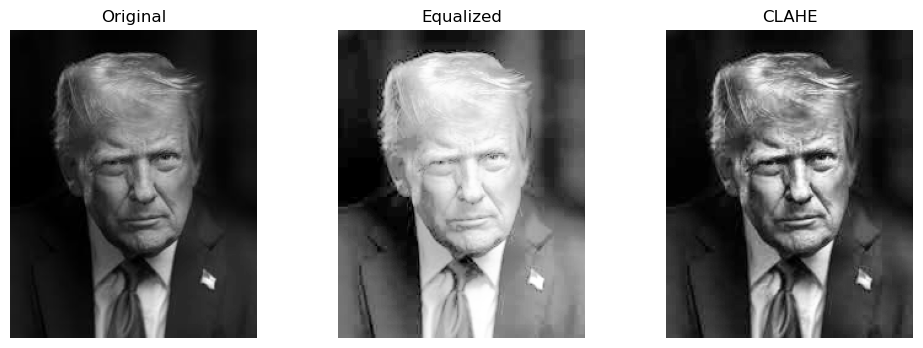

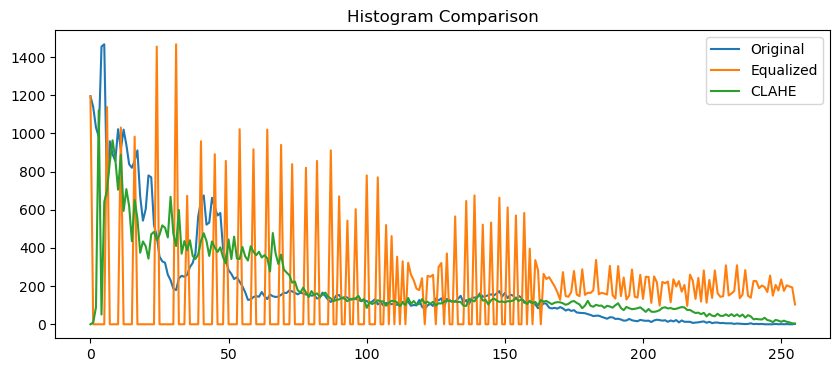

In [15]:
img = cv2.imread("trump.jpg", cv2.IMREAD_GRAYSCALE)

eq = cv2.equalizeHist(img)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

plt.figure(figsize=(12,4))
plt.subplot(131); plt.imshow(img,cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(132); plt.imshow(eq,cmap='gray'); plt.title("Equalized"); plt.axis("off")
plt.subplot(133); plt.imshow(clahe_img,cmap='gray'); plt.title("CLAHE"); plt.axis("off")
plt.show()

plt.figure(figsize=(10,4))
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]), label="Original")
plt.plot(cv2.calcHist([eq],[0],None,[256],[0,256]), label="Equalized")
plt.plot(cv2.calcHist([clahe_img],[0],None,[256],[0,256]), label="CLAHE")
plt.legend()
plt.title("Histogram Comparison")
plt.show()

## TASK 4 — Gamma Sweep

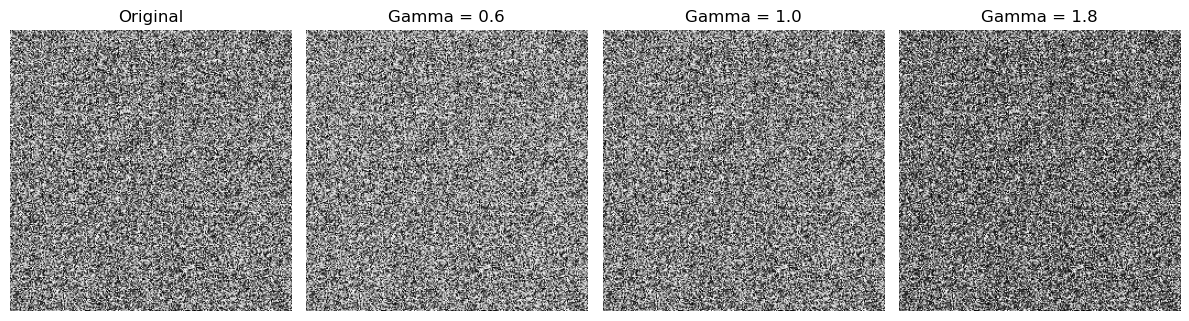

In [16]:
def apply_gamma(img, gamma):
    img = img.astype(np.float32) / 255.0
    out = np.power(img, gamma)
    return np.uint8(np.clip(out * 255.0, 0, 255))

# Demo grayscale image
img = np.uint8(np.clip(60 + 80*np.random.rand(256,256), 0, 255))

# Apply gamma values
g1 = apply_gamma(img, 0.6)   # brighten
g2 = apply_gamma(img, 1.0)   # no change
g3 = apply_gamma(img, 1.8)   # darken

# Show all 4 results in one figure
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(g1, cmap='gray')
plt.title("Gamma = 0.6")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(g2, cmap='gray')
plt.title("Gamma = 1.0")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(g3, cmap='gray')
plt.title("Gamma = 1.8")
plt.axis("off")

plt.tight_layout()
plt.show()

### TASK 1 — Circular Mask
The circular mask keeps only the pixels inside the selected region and removes the background.
This happens because bitwise_and preserves pixel values where the mask is white (255) and sets others to zero.

###TASK 2 — Bit-Plane Reconstruction
The reconstructed image still shows the main structure even though only the top 3 bit-planes were used.
This is because higher bit-planes contain most of the important visual information, while lower planes mostly contain fine details or noise.